# Rozbuduj sieć konwolucyjną z projektu 6 do autokodera, poprzez dodanie symetrycznych warstw *Conv2DTranspose*. Przystosuj sieć do wykorzystania danych mnist (Ręcznie pisane cyfry) oraz by wyjście z encodera, oraz wejście dekodara było 10 elementową tablicą w której jedna wartość jest równa 1 a pozostąłe 0.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
print(x_train.shape)
print(x_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
import tensorflow
import keras
import pandas as pd
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout,UpSampling2D, BatchNormalization, Input, Reshape, Flatten, Conv2DTranspose, MaxPooling2D
from keras.optimizers import adam

In [5]:
# funkcja aktywacji
from tensorflow.keras import backend as K

def activation_fun(x):
    max_prob = K.max(x, axis=1, keepdims=True)
    return K.cast(K.equal(x, max_prob), K.floatx())
# zupełnie bez sensu

In [40]:
# encoder
inputs = Input((28,28,1))
encoded_11 = Conv2D(256,(3,3), activation='relu', padding = 'same')(inputs)
encoded_22 = MaxPooling2D((2,2), padding='same')(encoded_11)
encoded_1 = Conv2D(128,(3,3), activation='relu', padding = 'same')(encoded_22)
encoded_2 = MaxPooling2D((2,2), padding='same')(encoded_1)
encoded_3 = Conv2D(64,(3,3), activation='relu', padding = 'same')(encoded_2)
encoded_4 = MaxPooling2D((2,2), padding='same')(encoded_3)
encoded_5 = Flatten()(encoded_4)
encoded = Dense(10, activation='sigmoid')(encoded_5)
# decoder
decoded_1 = Dense(np.prod((7,7,1)))(encoded)
decoded_11 = Reshape((7,7,1))(decoded_1)
decoded_2 = Conv2DTranspose(64,(3,3), strides = 1, activation='relu', padding = 'same')(decoded_11)
decoded_3 = UpSampling2D((2, 2))(decoded_2)
decoded_4 = Conv2DTranspose(128,(3,3), strides = 2, activation='relu', padding = 'same')(decoded_3)
decoded_3 = UpSampling2D((2, 2))(decoded_2)
decoded_4 = Conv2DTranspose(256,(3,3), strides = 2, activation='relu', padding = 'same')(decoded_3)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(decoded_4)

auto_encoder = Model(inputs, decoded)
opt = keras.optimizers.Adam(learning_rate=0.0001)
auto_encoder.compile(loss='binary_crossentropy', optimizer=opt)
auto_encoder.summary()
# keras.utils.plot_model(auto_encoder, show_shapes=True, dpi=100)

# auto_encoder.fit(X_train, X_train, epochs=200)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 128)       295040    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          7379

# Wytrenuj model używając jedynie danych wejściowych, wyjście modelu równa się jego wejściu.


In [41]:
auto_encoder.fit(x_train, x_train, epochs=8, batch_size=100)

Epoch 1/8
600/600 [==============================] - 19s 31ms/step - loss: 0.3443
Epoch 2/8
600/600 [==============================] - 19s 32ms/step - loss: 0.2645
Epoch 3/8
600/600 [==============================] - 19s 32ms/step - loss: 0.2392
Epoch 4/8
600/600 [==============================] - 19s 31ms/step - loss: 0.2051
Epoch 5/8
600/600 [==============================] - 19s 32ms/step - loss: 0.1879
Epoch 6/8
600/600 [==============================] - 19s 32ms/step - loss: 0.1792
Epoch 7/8
600/600 [==============================] - 19s 32ms/step - loss: 0.1717
Epoch 8/8
600/600 [==============================] - 19s 32ms/step - loss: 0.1643


# Zaprezentuj na danych testowych jak wyglądają dane wejściowe, dane zwrócone przez encoder i dane wyjściowe.

In [42]:
pred = auto_encoder.predict(x_test, verbose=1)

313/313 [==============================] - 2s 5ms/step


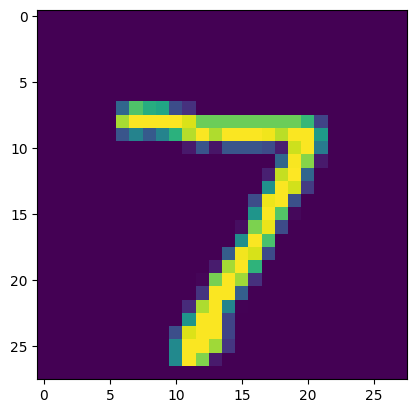

In [43]:
plt.imshow(x_test[0])

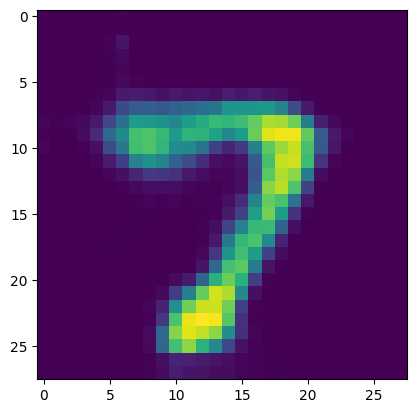

In [44]:
x =pred[0].reshape(28,28)
plt.imshow(x)

# Odziel model encodera i sprawdź co oznaczają parametry wyjściowe. Czy obrazy zostały sklasyfikowane zgodnie z tym co pokazują?


In [46]:
# auto_encoder.save('autoencoder.hdf5')
# autoencoder= keras.models.load_model('autoencoder.hdf5')

In [47]:
# oddzielanie encodera
encoder = Model(auto_encoder.input, auto_encoder.layers[-7].output)

In [48]:
encoder.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 256)       2560      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 256)      0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 128)       295040    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 128)        0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 7, 7, 64)          7379

In [49]:
pred_1 = encoder.predict(x_test, verbose=1)

313/313 [==============================] - 1s 2ms/step


In [50]:
pred_1[0]

array([0.4638951 , 0.79270613, 0.7419421 , 0.10400393, 0.29844278,
       0.9999994 , 0.44710684, 0.10394688, 0.5425581 , 0.8367498 ],
      dtype=float32)

predicted class:  2
real class:  2


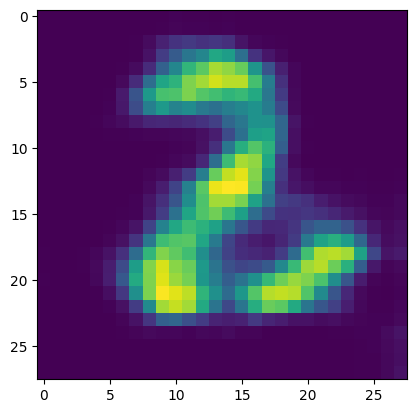

In [53]:
x =pred[1].reshape(28,28)
plt.imshow(x)
index = np.argmin(pred_1[1])
print('predicted class: ', index)
print('real class: ', y_test[1])
